In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [7]:
df = pd.read_csv('StudentsPerformance.csv')

In [10]:
print("The first 5 rows of data:")
display(df.head())

The first 5 rows of data:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# 🧩 4. معلومات عامة عن الأعمدة والأنواع وعدد القيم غير المفقودة
print("Information about the columns:")
df.info()

Information about the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
print("\nDescriptive statistics for numerical columns:")
display(df.describe())


Descriptive statistics for numerical columns:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
print(f"\nNumber of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")
print("\nColumn names:", df.columns.tolist())


Number of rows: 1000, Number of columns: 8

Column names: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [15]:
print("\nMissing values per column:")
display(df.isnull().sum())


Missing values per column:


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [18]:
categorical_cols = df.select_dtypes(include='object').columns
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"\nUnique values in {col}:\n{df[col].value_counts()}")


Unique values in categorical columns:

Unique values in gender:
gender
female    518
male      482
Name: count, dtype: int64

Unique values in race/ethnicity:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Unique values in parental level of education:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Unique values in lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Unique values in test preparation course:
test preparation course
none         642
completed    358
Name: count, dtype: int64


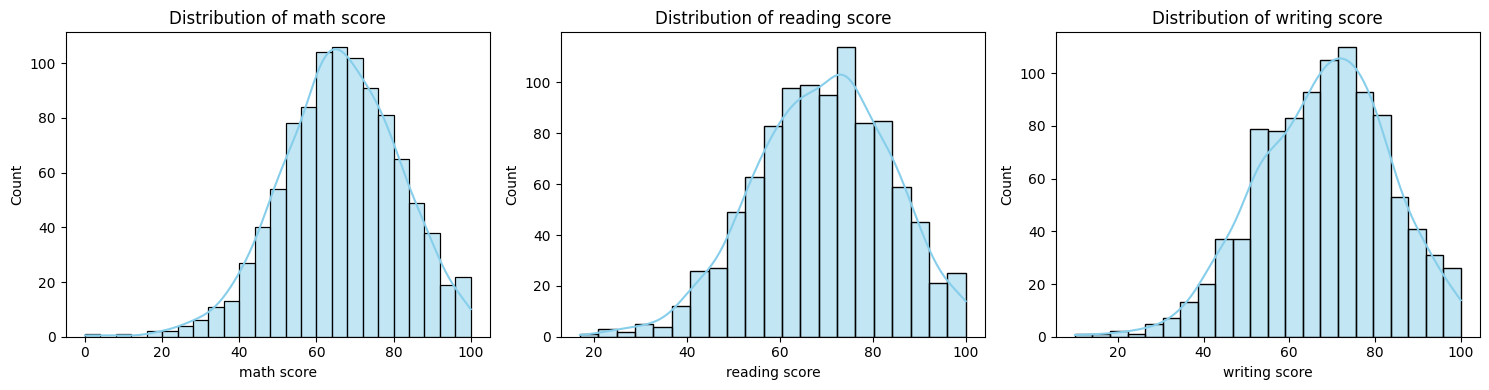

In [20]:
plt.figure(figsize=(15,4))
for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

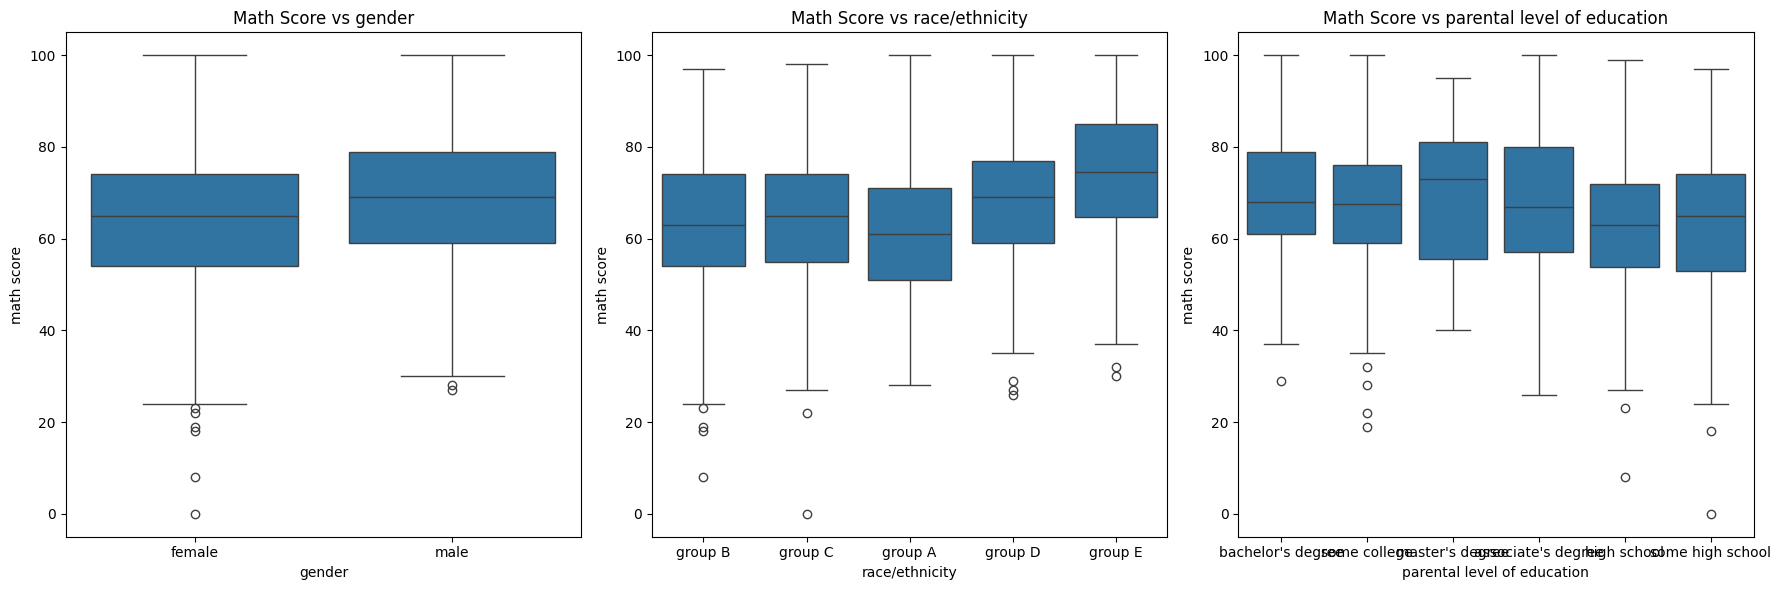

In [21]:
plt.figure(figsize=(18,6))
for i, col in enumerate(['gender', 'race/ethnicity', 'parental level of education']):
    plt.subplot(1,3,i+1)
    sns.boxplot(x=col, y='math score', data=df)
    plt.title(f'Math Score vs {col}')
plt.tight_layout()
plt.show()

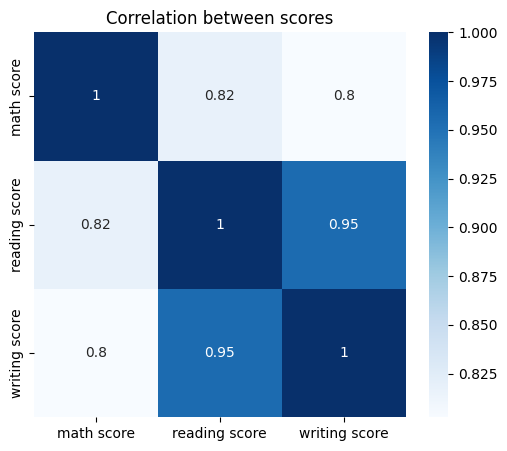

In [22]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='Blues')
plt.title("Correlation between scores")
plt.show()

In [23]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
print("\nFirst 5 rows after adding 'average score':")
display(df.head())


First 5 rows after adding 'average score':


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


/tmp/ipython-input-26-885661061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='average score', data=df, palette='pastel')


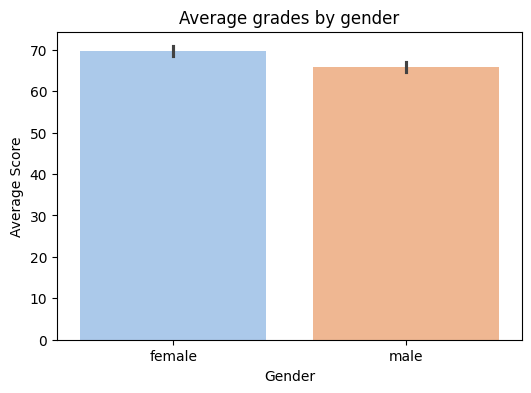

In [26]:
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='average score', data=df, palette='pastel')
plt.title('Average grades by gender')
plt.ylabel('Average Score')
plt.xlabel('Gender')
plt.show()

/tmp/ipython-input-27-2071233191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test preparation course', y='average score', data=df, palette='Set2')


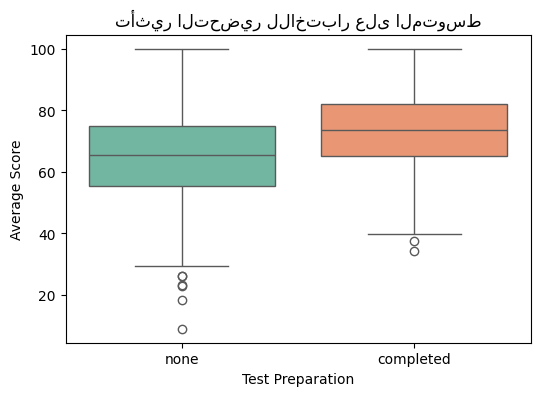

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x='test preparation course', y='average score', data=df, palette='Set2')
plt.title('تأثير التحضير للاختبار على المتوسط')
plt.ylabel('Average Score')
plt.xlabel('Test Preparation')
plt.show()

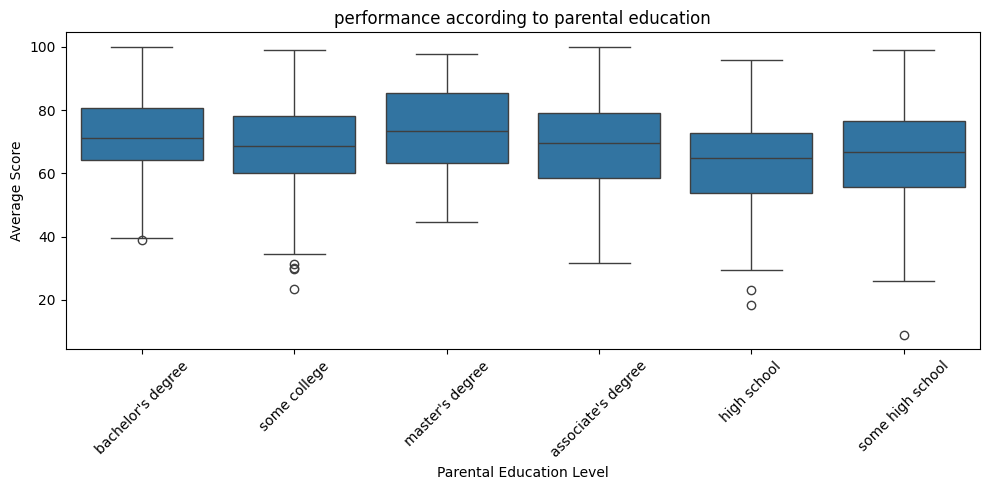

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x='parental level of education', y='average score', data=df)
plt.xticks(rotation=45)
plt.title('performance according to parental education')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

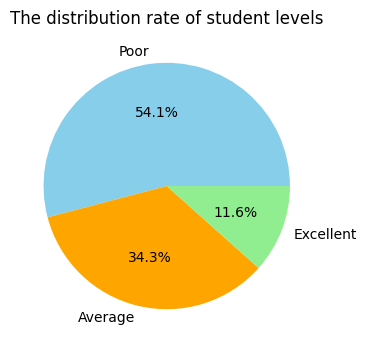

In [32]:
# دالة تصنيف
def classify_score(score):
    if score >= 85:
        return 'Excellent'
    elif score >= 70:
        return 'Average'
    else:
        return 'Poor'

# تطبيق التصنيف
df['performance level'] = df['average score'].apply(classify_score)

# رسم النسب
plt.figure(figsize=(5,4))
df['performance level'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue','orange','lightgreen'])
plt.title('The distribution rate of student levels')
plt.ylabel('')
plt.show()

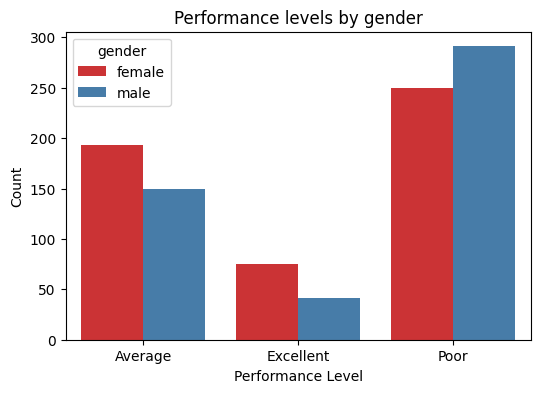

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='performance level', hue='gender', data=df, palette='Set1')
plt.title('Performance levels by gender')
plt.xlabel('Performance Level')
plt.ylabel('Count')
plt.show()